# CREDIT CARD DATA CLUSTERING (Project ECE 447)

## Group Members:
### Abhi Sharma: 1643951
### Gurvansh Singh: 
### Purnapushkala:
### Taran

## Exploring our Data / Data Preprocessing

In [1]:
#loading our data
import pandas as pd
credit = pd.read_csv("credit-card.csv")

In [2]:
credit

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
min(credit["MINIMUM_PAYMENTS"])

0.019163

Just by looking at the dataset, we can clearly see that there are a lot of missing values in some of the columns. Let us check how many missing values are there in each of the columns.

In [4]:
# Cheching for missing values
credit.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

We can clearly see above that there are a lot of missing values in the minimum payments column. Now we need to figure out a way using which we can deal with these missing values.
This can be done in a number of different ways but let us first look at what the column represents.

In [5]:
credit["MINIMUM_PAYMENTS"].head(20)

0       139.509787
1      1072.340217
2       627.284787
3              NaN
4       244.791237
5      2407.246035
6       198.065894
7       532.033990
8       311.963409
9       100.302262
10     2172.697765
11      155.549069
12      490.207013
13      251.137986
14      989.962866
15     2109.906490
16      376.579631
17       73.203221
18      744.613395
19    12465.549380
Name: MINIMUM_PAYMENTS, dtype: float64

Now since we cannot conclude much by just looking at this, thus we need to see what variable does this feature depend most on and for doing that we can plot a coorelation specifically for this feature. 

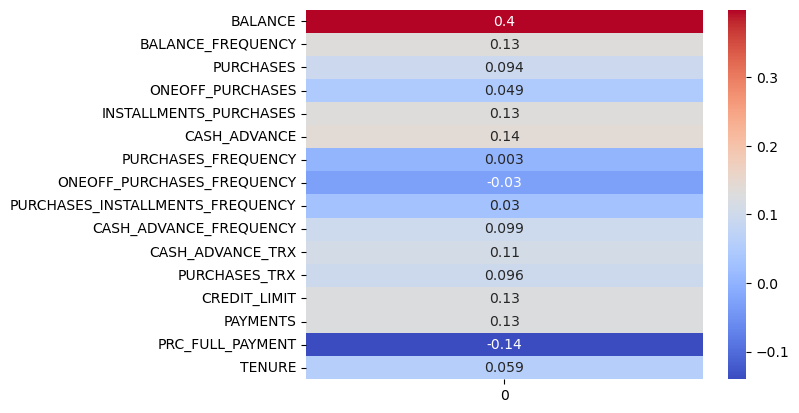

In [6]:
#Plotting the correlation
import seaborn as sns
temp_df = credit.drop("MINIMUM_PAYMENTS", axis = 1)
corr_mat = temp_df.corrwith(credit["MINIMUM_PAYMENTS"])
sns.heatmap(corr_mat.to_frame(), annot = True, cmap = "coolwarm");

Here we can clearly see that the feature variable labelled `MINIMUM_PAYMENTS` is most influenced by the variable `BALANCE`. As mentioned earlier, there are a number of different ways of dealing with missing data. For instance, we can either remove the records with missing data, we can take the mean or the median of the column. However, here we try to use the column called `BALANCE` for predicting the value of `MINIMUM_PAYMENTS`. I will use 3 to 4 most prominent features to predict this.  

This can be done using a simple linear regression model.

In [7]:
credit.shape

(8950, 18)

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
credit["CREDIT_LIMIT"].fillna(value = np.argmax(credit["CREDIT_LIMIT"]), inplace = True) 
# Since there is only 1 missing value in the credit limit column we are filling it up with the value with the most frequency/mode.

In [9]:
credit.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
X1 = credit.dropna()

In [11]:
X1

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [12]:
X1 = X1.drop("CUST_ID", axis = 1)
X2 = X1.drop("MINIMUM_PAYMENTS", axis = 1)
y = X1["MINIMUM_PAYMENTS"]

In [13]:
X2

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,0.000000,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,0.500000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,0.250000,6


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.2)

In [15]:
X_train.shape

(6909, 16)

In [16]:
reg = LinearRegression()

In [17]:
import numpy as np
np.random.seed(42)
reg.fit(X_train, y_train)

LinearRegression()

In [18]:
r2 = reg.score(X_test, y_test)


In [19]:
#let us also look at the mean absolute error
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR

In [20]:
r2

0.1925078201967022

In [21]:
#np.random.seed(42)
reg1 = RandomForestRegressor()
reg1.fit(X_train, y_train)

RandomForestRegressor()

In [22]:
reg1.score(X_test, y_test)

0.3681477830162635

In [23]:
test_preds = reg1.predict(X_test)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, test_preds)

415.49388071728004

We have tried a couple of different ways to impute, however due to low correlation between the features we concluded that it will be best if we use Another way to impute missing values is the KNNImputer

However just before I do that I just need to check the accuracy of the model and to do that I will drop some values from the training values and then check how good the model is in predicting the values

In [24]:
credit.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [25]:
knn_df = credit.drop("CUST_ID", axis = 1)

In [26]:
knn_df.dropna(inplace=True)

In [27]:
knn_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [28]:
knn_df.shape

(8637, 17)

In [29]:
knn_df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [30]:
len(knn_df.index.unique())

8637

In [31]:
knn_df = knn_df.reset_index(drop=True)

In [32]:
max(knn_df.index)

8636

In [33]:
# randomly drop 1800 values of and store them in a list
import random
missing_values = []
dropped_indices = []
while len(dropped_indices) < 1800:
    idx = np.random.choice(knn_df.index)
    if idx not in dropped_indices:
        dropped_indices.append(idx)
        missing_values.append(knn_df.loc[idx, "MINIMUM_PAYMENTS"])
        knn_df.loc[idx, "MINIMUM_PAYMENTS"] = np.nan

In [34]:
knn_df.isna().sum()

BALANCE                                0
BALANCE_FREQUENCY                      0
PURCHASES                              0
ONEOFF_PURCHASES                       0
INSTALLMENTS_PURCHASES                 0
CASH_ADVANCE                           0
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY             0
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY                 0
CASH_ADVANCE_TRX                       0
PURCHASES_TRX                          0
CREDIT_LIMIT                           0
PAYMENTS                               0
MINIMUM_PAYMENTS                    1800
PRC_FULL_PAYMENT                       0
TENURE                                 0
dtype: int64

In [35]:
from sklearn.impute import KNNImputer
features = knn_df.columns

# Fit KNNImputer model on training set
k = 5
imputer = KNNImputer(n_neighbors=k)
knn_imputed = imputer.fit_transform(knn_df[features])
df1 = pd.DataFrame(knn_imputed, columns = features)


Now let us check the accuracy of our model and compare the R2 score and the mean absolute error.

In [36]:
values_list = list(df1.iloc[dropped_indices]["MINIMUM_PAYMENTS"])

Let us now check the accuracy of our KNNImputer

In [37]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
mean_absolute_error(values_list, missing_values)

488.5303164794445

In [38]:
r2_score(values_list, missing_values)

-4.6779803479644455

After trying a bunch of different methods to impute the data we have concluded that the feature with the missing values `MINIMUM PAYMENTS` has very little correlation with the rest of the variable and thus we are getting very little accuracy and high MAE values.
Thus considering everything we concluded that it will be best to drop the missing values.

In [39]:
credit.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### Dropping missing values

In [40]:
credit_new = credit.dropna()

In [41]:
credit_new.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [46]:
credit_new= credit_new.drop("CUST_ID", axis = 1)b

In [47]:
credit_new

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# Modelling/Clustering our Data

Now since we have the data in the right shape, this suggests that we can start modelling our dataset

There are several models we are going to try on our dataset:
1. K-means clustering
2. Hirarchical clustering
3. Gaussian Mixture modelling
4. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

## 1. K-means clustering

In [43]:
# Importing the important libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Elbow method

We will make use of the elbow method to figure how many clusters (k) are appropriate for our data.

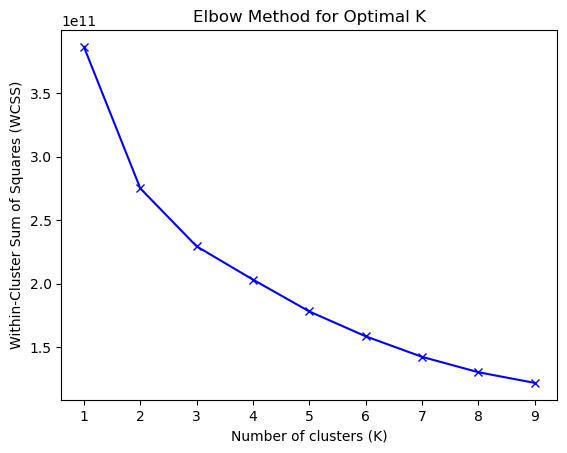

In [53]:
k_val = range(1, 10)
wcss_val = []
for k in k_val:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(credit_new)
    wcss_val.append(kmeans.inertia_)
plt.plot(k_val, wcss_val, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.show()

Looking at the graph, we can conclude that k = 2 or k = 3 will be the best selcetion for the k value and thus I believe that this will be a great selection as thats where we can see the elbow.

Now let us train our model on the data

In [54]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 42)
kmeans.fit(credit_new)

In [56]:
kmeans.labels_

array([1, 0, 0, ..., 1, 1, 1])

### Visualizing our clusters

Since we have multdimensional data with a lot of clusters, it will be very difficult to visualize the clusters. Thus we will implement PCA to reduce the dimensionality of our data so that we can visualize our clusters. Before we do that we need to normalize our data.

In [63]:
from sklearn.decomposition import PCA
import plotly.graph_objs as go
pca = PCA(n_components = 3)
credit_pca = pca.fit_transform(credit_new)
k = 3

# Get the names of the most important feature variables for each PC
pc1_feature_names = credit_new.columns[np.abs(pca.components_[0]).argsort()[::-1][:3]]
pc2_feature_names = credit_new.columns[np.abs(pca.components_[1]).argsort()[::-1][:3]]
pc3_feature_names = credit_new.columns[np.abs(pca.components_[2]).argsort()[::-1][:3]]
# Create a 3D scatter plot
fig = go.Figure(data=go.Scatter3d(
    x=credit_pca[:, 0],
    y=credit_pca[:, 1],
    z=credit_pca[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=kmeans.labels_,
        colorscale='Viridis',
        opacity=0.8,
    )
))

# Set axis labels to the most important feature variable names for each PC
fig.update_layout(scene=dict(
        xaxis_title=pc1_feature_names[0],
        yaxis_title=pc2_feature_names[0],
        zaxis_title=pc3_feature_names[0]
    ))
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)')

fig.show()

From above, we also concluded that the most important/prominent features in the data are `MINIMUM_PAYMENTS`, `PURCHASES` and `CREDIT_LIMIT`